In [ ]:
import pandas as pd
merged_df = pd.read_csv("merged_restaurants_census.csv")

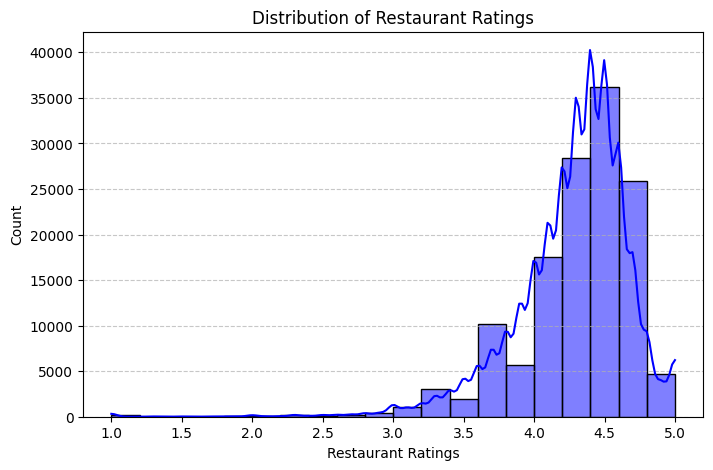

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(merged_df["Rating"], bins=20, kde=True, color="blue")
plt.xlabel("Restaurant Ratings")
plt.ylabel("Count")
plt.title("Distribution of Restaurant Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

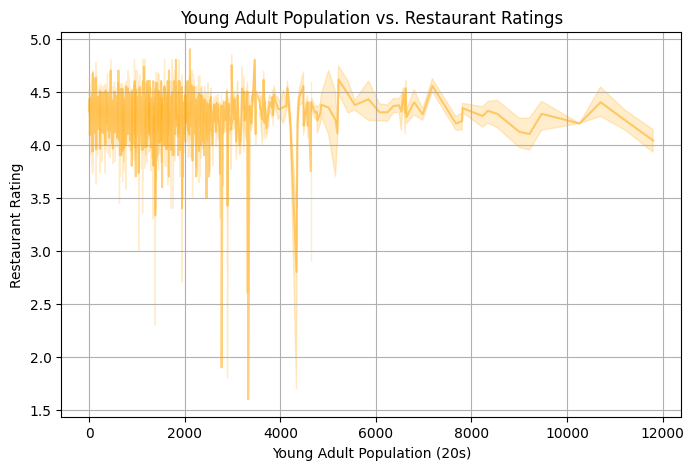

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
merged_df["Total Young Adults"] = merged_df["Males_20yrs_age"] + merged_df["Females_20yrs_age"]

plt.figure(figsize=(8, 5))
sns.lineplot(x="Total Young Adults", y="Rating", data=merged_df, alpha=0.5, color="orange")
plt.xlabel("Young Adult Population (20s)")
plt.ylabel("Restaurant Rating")
plt.title("Young Adult Population vs. Restaurant Ratings")
plt.grid(True)
plt.show()


<ipython-input-71-12e2815063e9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ZCTA", y="Rating", data=random_avg_rating_per_zip, palette="coolwarm")


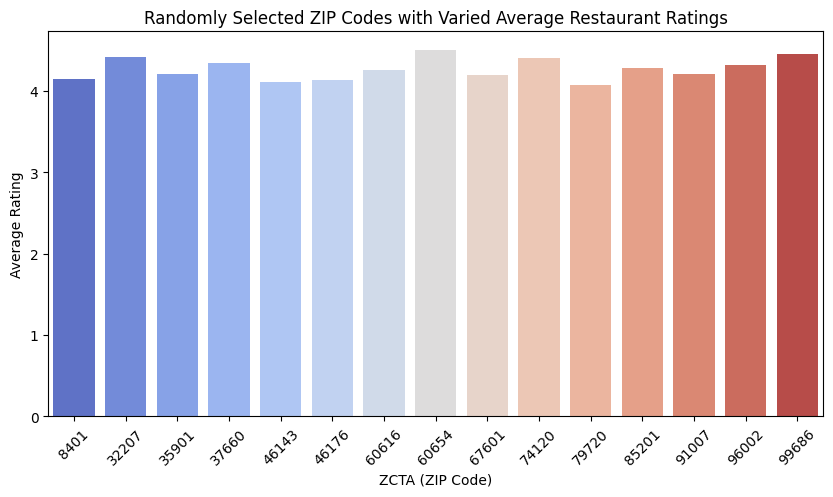

In [ ]:

# Select random ZIP codes with varied ratings
random_zip_codes = merged_df["ZCTA"].dropna().sample(n=15, random_state=42).unique()

# Compute average rating for these selected ZIP codes
random_avg_rating_per_zip = merged_df[merged_df["ZCTA"].isin(random_zip_codes)].groupby("ZCTA")["Rating"].mean().reset_index()

# Plot the randomly selected ZIP codes with their average ratings
plt.figure(figsize=(10, 5))
sns.barplot(x="ZCTA", y="Rating", data=random_avg_rating_per_zip, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("ZCTA (ZIP Code)")
plt.ylabel("Average Rating")
plt.title("Randomly Selected ZIP Codes with Varied Average Restaurant Ratings")
plt.show()


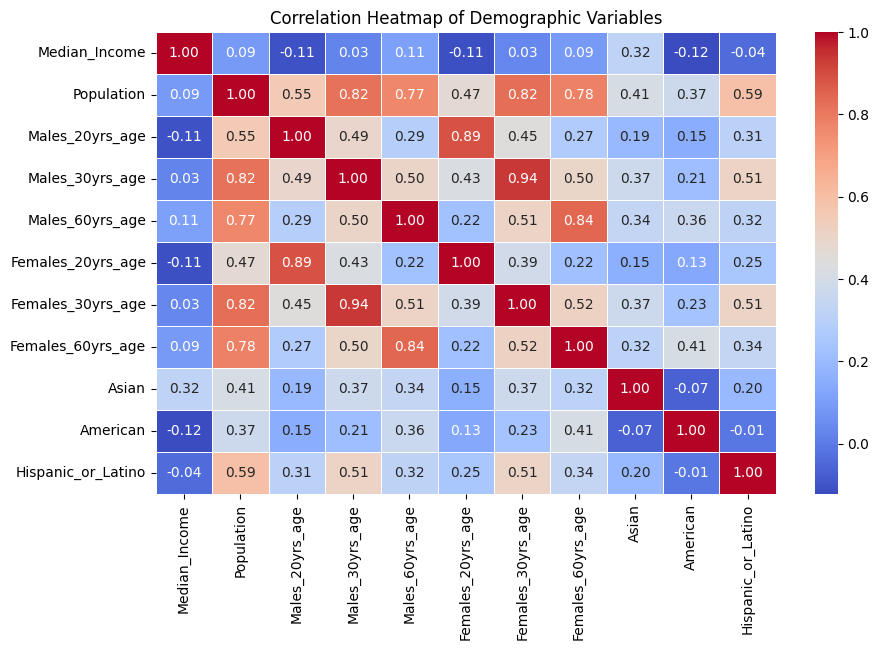

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = merged_df[["Median_Income", "Population", "Males_20yrs_age", "Males_30yrs_age",
                  "Males_60yrs_age", "Females_20yrs_age", "Females_30yrs_age",
                  "Females_60yrs_age", "Asian", "American", "Hispanic_or_Latino"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Demographic Variables")
plt.show()


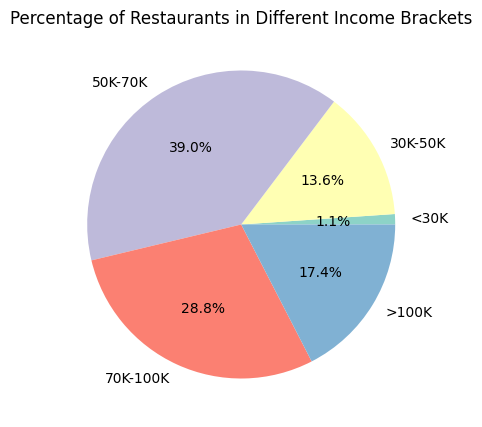

In [ ]:
income_bins = [0, 30000, 50000, 70000, 100000, merged_df["Median_Income"].max()]
income_labels = ["<30K", "30K-50K", "50K-70K", "70K-100K", ">100K"]
merged_df["Income_Bracket"] = pd.cut(merged_df["Median_Income"], bins=income_bins, labels=income_labels)

plt.figure(figsize=(8, 5))
merged_df["Income_Bracket"].value_counts().sort_index().plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("Set3"))
plt.title("Percentage of Restaurants in Different Income Brackets")
plt.ylabel("")
plt.show()

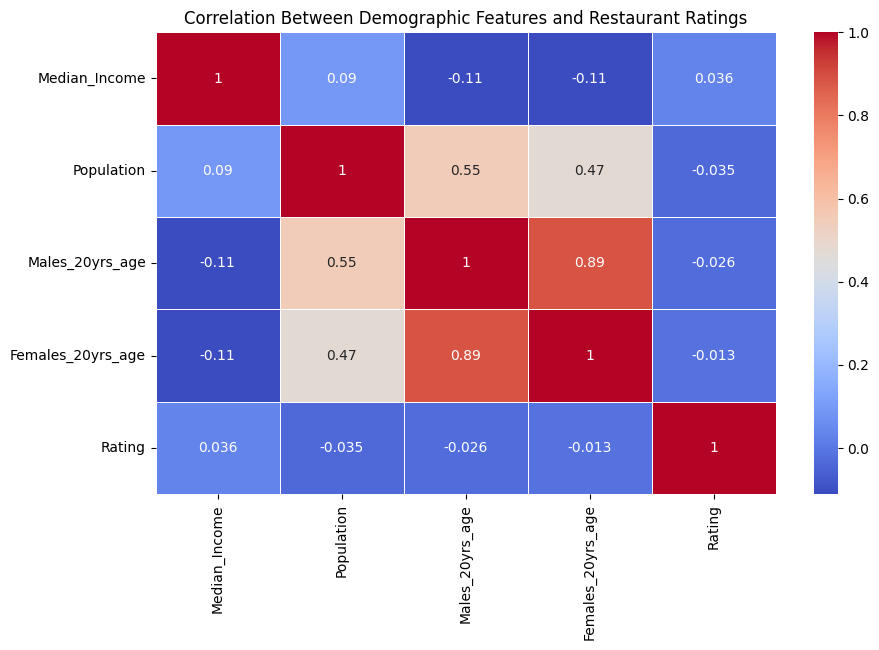

In [ ]:
plt.figure(figsize=(10, 6))
corr_columns = ["Median_Income", "Population", "Males_20yrs_age", "Females_20yrs_age", "Rating"]
corr_matrix = merged_df[corr_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Demographic Features and Restaurant Ratings")
plt.show()


['Low Income' 'High Income']


<ipython-input-76-dcc58ad75355>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Income_Level", y="Rating", data=merged_df, palette="muted", inner="quartile")


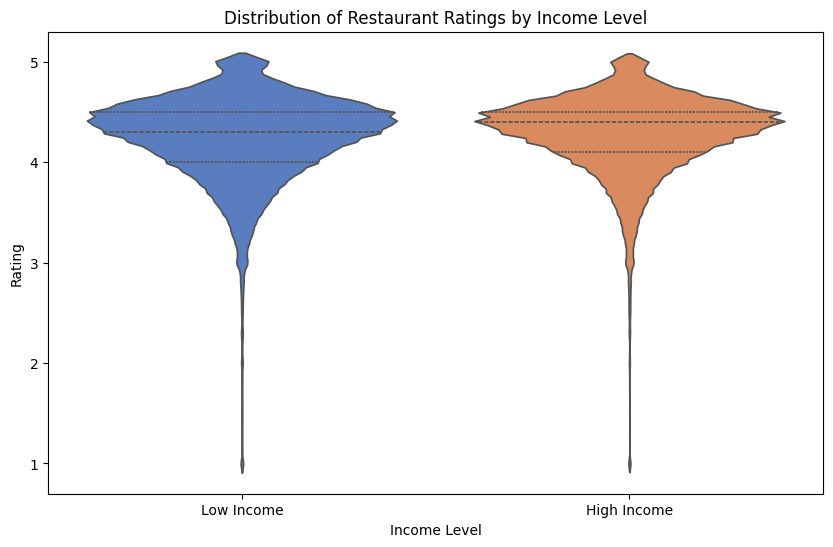

In [ ]:
# Ensure "Income_Level" is properly defined before using it in the violin plot
high_income_threshold = merged_df["Median_Income"].median()
merged_df["Income_Level"] = merged_df["Median_Income"].apply(lambda x: "High Income" if x >= high_income_threshold else "Low Income")

# Check unique values to confirm correct classification
print(merged_df["Income_Level"].unique())

# 30. Violin Plot - Distribution of Restaurant Ratings by Income Level (Fixed)
plt.figure(figsize=(10, 6))
sns.violinplot(x="Income_Level", y="Rating", data=merged_df, palette="muted", inner="quartile")
plt.title("Distribution of Restaurant Ratings by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Rating")
plt.show()


<ipython-input-77-a0df2cc5b977>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Income_Level"] = filtered_df["Median_Income"].apply(lambda x: "High Income" if x >= high_income_threshold else "Low Income")


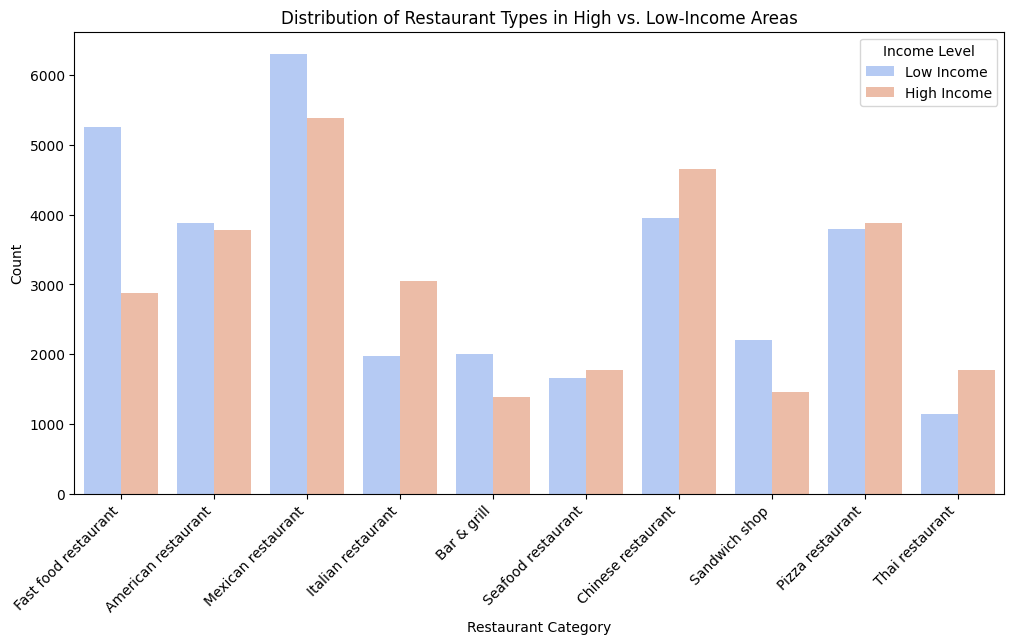

In [ ]:
filtered_df = merged_df[~merged_df["Category"].str.contains("^Restaurant$", case=False, na=False)]
high_income_threshold = filtered_df["Median_Income"].median()
filtered_df["Income_Level"] = filtered_df["Median_Income"].apply(lambda x: "High Income" if x >= high_income_threshold else "Low Income")
top_categories_list = filtered_df["Category"].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x="Category", hue="Income_Level", data=filtered_df[filtered_df["Category"].isin(top_categories_list)], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Restaurant Types in High vs. Low-Income Areas")
plt.xlabel("Restaurant Category")
plt.ylabel("Count")
plt.legend(title="Income Level")
plt.show()

<ipython-input-78-5d3794e3d90c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Rating", data=filtered_df, palette="pastel")


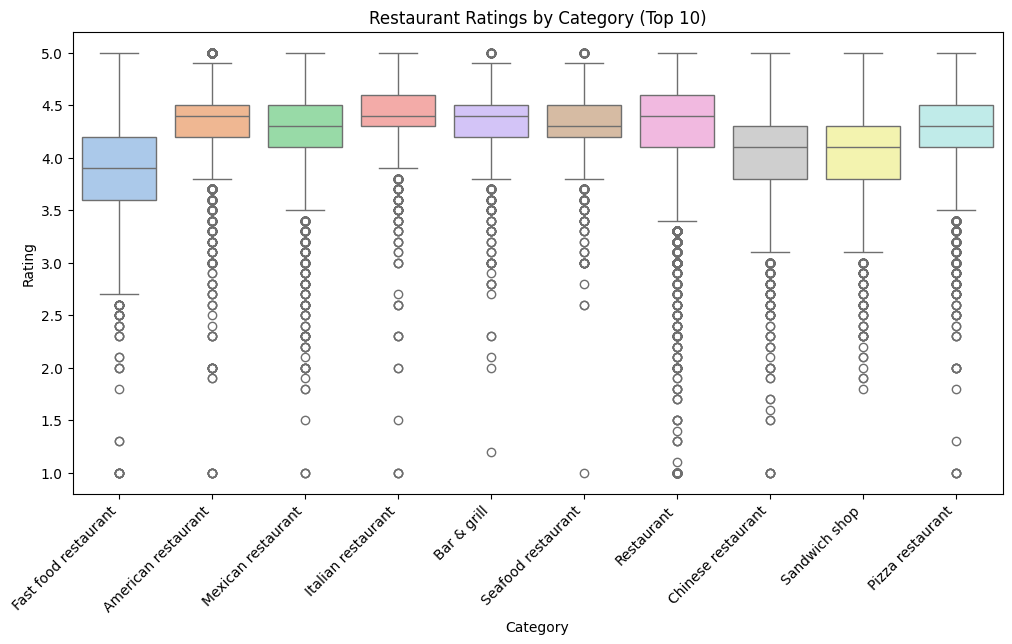

In [ ]:
plt.figure(figsize=(12, 6))
top_categories_list = merged_df["Category"].value_counts().nlargest(10).index
filtered_df = merged_df[merged_df["Category"].isin(top_categories_list)]
sns.boxplot(x="Category", y="Rating", data=filtered_df, palette="pastel")
plt.xticks(rotation=45, ha="right")
plt.title("Restaurant Ratings by Category (Top 10)")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

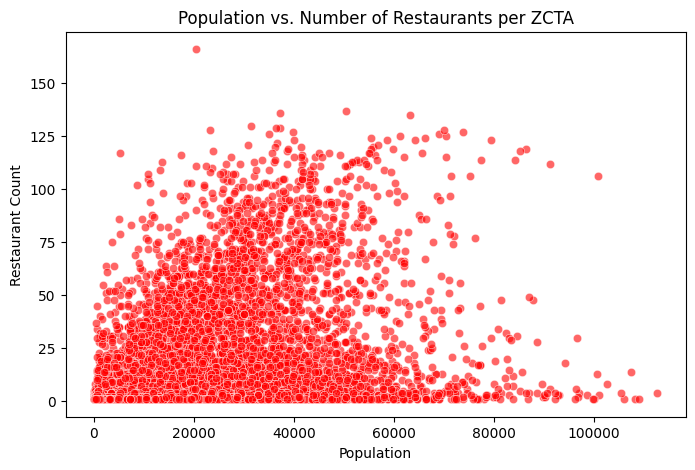

In [ ]:
restaurant_count_by_zcta = merged_df.groupby("ZCTA")["Title"].count().reset_index().rename(columns={"Title": "Restaurant_Count"})
merged_df = merged_df[["ZCTA", "Population"]].drop_duplicates().merge(restaurant_count_by_zcta, on="ZCTA")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_df["Population"], y=merged_df["Restaurant_Count"], alpha=0.6, color="red")
plt.title("Population vs. Number of Restaurants per ZCTA")
plt.xlabel("Population")
plt.ylabel("Restaurant Count")
plt.show()

<ipython-input-80-53789a1157cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ZCTA", y="Restaurant Count", data=top_zctas, palette="viridis")


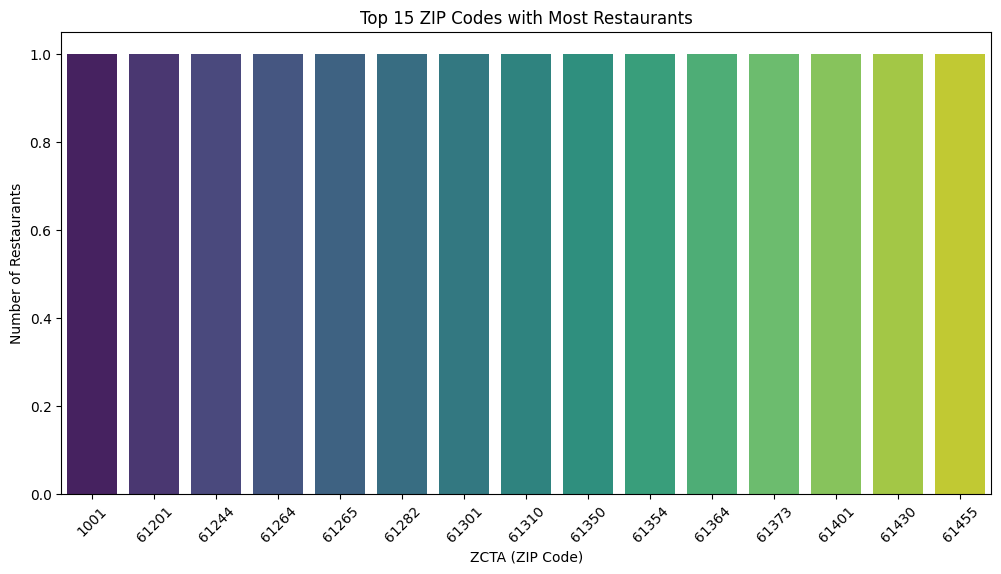

In [ ]:
restaurant_count_per_zcta = merged_df.groupby("ZCTA").size().reset_index(name="Restaurant Count")
top_zctas = restaurant_count_per_zcta.sort_values("Restaurant Count", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x="ZCTA", y="Restaurant Count", data=top_zctas, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("ZCTA (ZIP Code)")
plt.ylabel("Number of Restaurants")
plt.title("Top 15 ZIP Codes with Most Restaurants")
plt.show()
